In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import imageio
import random as rd

class cell():
    def mito_attraction(self):

        N = 10 #No. of Boids
        frames = 60 #No. of frames
        limit = 100 #Axis Limits
        L  = limit*2
        P = 10 #Spread of initial position (gaussian)
        V = 10 #Spread of initial velocity (gaussian)
        delta = 1 #Time Step
        c1 = 0.0253 #Attraction Scaling factor
        c2 = 0 #Repulsion scaling factor
        c3 = 4 #Heading scaling factor
        c4 = 0.2 #Randomness scaling factor

        vlimit = 1 #Maximum velocity
        filenames = []
        #Initialize
        p = P*np.random.randn(2,N)
        v = V*np.random.randn(2,N)
        
        #Initializing plot
        plt.ion()
        fig = plt.figure(figsize=(10,5))
        ax = fig.add_subplot(111)

        for i in range(frames):
          
            v1 = np.zeros((2,N+2))
            v2 = np.zeros((2,N+2))                 
            v3 = ( (np.sum(v[0,:])/(N) ) + (np.sum(v[1,:])/(N)) ) * c3;  #align average heading
            #Calculate Average Velocity v3 
            v4 = np.zeros((2,N))
            
            if (np.linalg.norm(v3) > vlimit): #limit maximum velocity
                v3 *= vlimit / np.linalg.norm(v3)
            
            #print(p)
            #print(np.shape(p))
            
            for n in range(N):
                for m in range(N):
                    if m!=n:

                        #Compute vector r from one agent to the next
                        r = p[:,m] - p[:,n] 

                        if r[0] > L/2:
                            r[0] -= L
                        elif r[0] < -L/2:
                            r[0] += L

                        if r[1] > L/2:
                            r[1] -= L
                        elif r[1] < -L/2:
                            r[1] += L
                        #Compute distance between agents rmag

                        rmag = np.sqrt( r[0]**2  + r[1]**2 )
                        #Compute attraction v1
                        v1[:,n] += c1*r 
                        #Compute Repulsion [non-linear scaling] v2
                        
                        v2[:,n] -= (c2 * r) / (rmag**2)
                        #Compute Repulsion [non-linear scaling] v2
                   
                v4[:,n] = c4 * np.random.randn(2) #Compute random velocity component v4
                
                #v5 = c4 * np.random.randn(2,1)
                #print(v4.shape)
                #print(v5.shape)                
                v[:,n] = v1[:,n] + v2[:,n] + v3 + v4[:,n] #+ v5 #Update velocity

            for n in range(0, N):    
                p[:,n] +=  v[:,n] * delta #Update position

            #Periodic boundary

            tmp_p = p
            tmp_p[0, p[0,:] >  L/2]  = tmp_p[0,p[0,:]> (L/2)] - L
            tmp_p[1, p[1,:] >  L/2]  = tmp_p[1, p[1,:] > (L/2)] - L
            tmp_p[0, p[0,:] < -L/2]  = tmp_p[0, p[0,:] < (-L/2)] + L
            tmp_p[1, p[1,:] < -L/2]  = tmp_p[1, p[1,:] < (-L/2)] + L
            p = tmp_p

            # Can Also be written as:
            # p[p > limit] -= limit * 2
            # p[p < -limit] += limit * 2

            #line1, = ax.plot(p[0, 0], p[1, 0])

            #update plot
            colors = "orange"

            ax.clear()
            ax.scatter(p[0,:], p[1,:], c=colors, alpha=1) # For drawing velocity arrows
            
            plt.xlim(-limit, limit)
            plt.ylim(-limit, limit)
            #line1.set_data(p[0,:], p[1,:])

            #plt.show()
            fig.canvas.draw()
            if i == 0:
                with open('pos_vel/attraction.txt', 'w') as f: # very rudimentary, would be better as dataframe to csv
                    f.write(str([p,v]))
                f.close()
            else:
                with open('pos_vel/attraction.txt', 'a') as f: # very rudimentary, would be better as dataframe to csv
                    f.write(str([p,v]))
                f.close()
        #     plt.savefig('mito/mito_attract/frames/frame' + str(i) +'.jpg')
            
        #     filenames.append('mito/mito_attract/frames/frame' + str(i) + '.jpg')
        #     plt.savefig(filenames[i])
        # images = []
        # for filename in filenames:
        #    images.append(imageio.imread(filename))
        # imageio.mimsave('mito/mito_attract/attraction.gif',images) 

    def mito_repulsion(self):
        N = 10 #No. of Boids
        frames = 60 #No. of frames
        limit = 100 #Axis Limits
        L  = limit*2
        P = 1 #Spread of initial position (gaussian)
        V = 1 #Spread of initial velocity (gaussian)
        delta = 1 #Time Step
        c1 = 0 #Attraction Scaling factor
        c2 = .1023 #Repulsion scaling factor
        c3 = 4 #Heading scaling factor
        c4 = 0.2 #Randomness scaling factor

        vlimit = 1 #Maximum velocity
        filenames = []
        #Initialize
        p = P*np.random.randn(2,N)
        v = V*np.random.randn(2,N)
        
        #Initializing plot
        plt.ion()
        fig = plt.figure(figsize=(10,5))
        ax = fig.add_subplot(111)

        for i in range(frames):
          
            v1 = np.zeros((2,N+2))
            v2 = np.zeros((2,N+2))                 
            v3 = ( (np.sum(v[0,:])/(N) ) + (np.sum(v[1,:])/(N)) ) * c3;  #align average heading
            #Calculate Average Velocity v3 
            v4 = np.zeros((2,N))
            
            if (np.linalg.norm(v3) > vlimit): #limit maximum velocity
                v3 *= vlimit / np.linalg.norm(v3)
            
            #print(p)
            #print(np.shape(p))
            
            for n in range(N):
                for m in range(N):
                    if m!=n:

                        #Compute vector r from one agent to the next
                        r = p[:,m] - p[:,n] 

                        if r[0] > L/2:
                            r[0] -= L
                        elif r[0] < -L/2:
                            r[0] += L

                        if r[1] > L/2:
                            r[1] -= L
                        elif r[1] < -L/2:
                            r[1] += L
                        #Compute distance between agents rmag

                        rmag = np.sqrt( r[0]**2  + r[1]**2 )
                        #Compute attraction v1
                        v1[:,n] += c1*r 
                        #Compute Repulsion [non-linear scaling] v2
                        
                        v2[:,n] -= (c2 * r) / (rmag**2)
                        #Compute Repulsion [non-linear scaling] v2
                   
                v4[:,n] = c4 * np.random.randn(2) #Compute random velocity component v4
                
                #v5 = c4 * np.random.randn(2,1)
                #print(v4.shape)
                #print(v5.shape)                
                v[:,n] = v1[:,n] + v2[:,n] + v3 + v4[:,n] #+ v5 #Update velocity

            for n in range(0, N):    
                p[:,n] +=  v[:,n] * delta #Update position

            #Periodic boundary

            tmp_p = p
            tmp_p[0, p[0,:] >  L/2]  = tmp_p[0,p[0,:]> (L/2)] - L
            tmp_p[1, p[1,:] >  L/2]  = tmp_p[1, p[1,:] > (L/2)] - L
            tmp_p[0, p[0,:] < -L/2]  = tmp_p[0, p[0,:] < (-L/2)] + L
            tmp_p[1, p[1,:] < -L/2]  = tmp_p[1, p[1,:] < (-L/2)] + L
            p = tmp_p

            # Can Also be written as:
            # p[p > limit] -= limit * 2
            # p[p < -limit] += limit * 2

            #line1, = ax.plot(p[0, 0], p[1, 0])

            #update plot
            colors = "orange"

            ax.clear()
            ax.scatter(p[0,:], p[1,:], c=colors, alpha=1) # For drawing velocity arrows
            
            plt.xlim(-limit, limit)
            plt.ylim(-limit, limit)
            #line1.set_data(p[0,:], p[1,:])

            #plt.show()
            fig.canvas.draw()
            if i == 0:
                with open('pos_vel/repulsion.txt', 'w') as f: # very rudimentary, would be better as dataframe to csv
                    f.write(str([p,v]))
                f.close()
            else:
                with open('pos_vel/repulsion.txt', 'a') as f: # very rudimentary, would be better as dataframe to csv
                    f.write(str([p,v]))
                f.close()
        #     plt.savefig('mito/mito_repulse/frames/frame' + str(i) +'.jpg')
            
        #     filenames.append('mito/mito_repulse/frames/frame' + str(i) + '.jpg')
        #     plt.savefig(filenames[i])
        # images = []
        # for filename in filenames:
        #    images.append(imageio.imread(filename))
        # imageio.mimsave('mito/mito_repulse/repulsion.gif',images) 

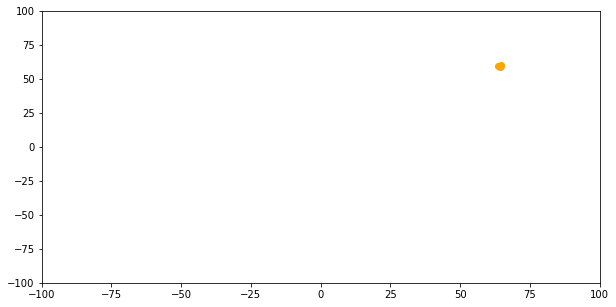

In [2]:
cell_py = cell()
cell_py.mito_attraction()

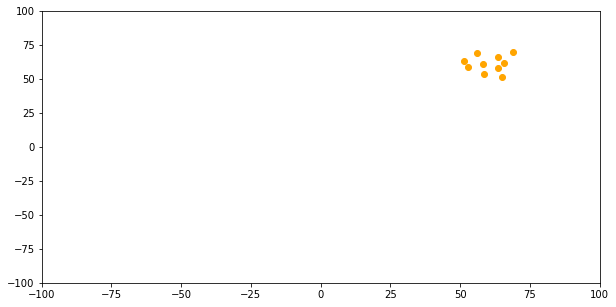

In [3]:
cell_py.mito_repulsion()

In [ ]:
# Need to represent autophagy

In [ ]:
# Need to represent replication